In [2]:
%pip install --upgrade tensorflow

  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.3.3-py3-none-any.whl.metadata (5.7 kB)
   ---------------------------------------- 0.0/376.9 MB ? eta -:--:--
   ---------------------------------------- 0.2/376.9 MB 3.9 MB/s eta 0:01:37
   ---------------------------------------- 1.0/376.9 MB 10.6 MB/s eta 0:00:36
   ---------------------------------------- 2.6/376.9 MB 18.3 MB/s eta 0:00:21
    --------------------------------------- 5.6/376.9 MB 30.0 MB/s eta 0:00:13
    --------------------------------------- 8.3/376.9 MB 37.7 MB/s eta 0:00:10
   - -------------------------------------- 11.6/376.9 MB 65.2 MB/s eta 0:00:06
   - -------------------------------------- 12.7/376.9 MB 73.1 MB/s eta 0:00:05
   - -------------------------------------- 12.7/376.9 MB 73.1 MB/s eta 0:00:05
   - -------------------------------------- 15.6/376.9 MB 43.7 MB/s eta 0:00:09
   - --

  You can safely remove it manually.

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# import libraries
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import pandas as pd
import numpy as np
import cv2

In [3]:
# load dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data = pd.read_csv('data/train_labels.csv')
train_data.head()

,filepath,label
0,data/train\angry\aug_0_100.jpeg,angry
1,data/train\angry\aug_0_1000.jpeg,angry
2,data/train\angry\aug_0_1012.jpeg,angry
3,data/train\angry\aug_0_1013.jpeg,angry
4,data/train\angry\aug_0_1015.jpeg,angry


In [4]:
test_data = pd.read_csv('data/test_labels.csv')
test_data.head()

,filepath,label
0,data/test\angry\aug_0_1012.jpeg,angry
1,data/test\angry\aug_0_1033.jpeg,angry
2,data/test\angry\aug_0_1067.jpeg,angry
3,data/test\angry\aug_0_1073.jpeg,angry
4,data/test\angry\aug_0_108.jpeg,angry


In [35]:
# class names
class_names = test_data['label'].unique()
class_names

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'],
      dtype=object)

In [5]:
# Function to load images
def load_images(filepaths):
    images = []
    for filepath in filepaths:
        image = cv2.imread(filepath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        images.append(image)
    return np.array(images)

# Load images
train_images = load_images(train_data['filepath'])
print(train_images.shape)
test_images = load_images(test_data['filepath'])
print(test_images.shape)

(46506, 48, 48)
(12141, 48, 48)


In [6]:
# Normalize images
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images

array([[[0.0627451 , 0.12156863, 0.19215686, ..., 0.62745098,
         0.63529412, 0.63529412],
        [0.05098039, 0.11764706, 0.20784314, ..., 0.6745098 ,
         0.68235294, 0.68627451],
        [0.04313725, 0.09411765, 0.19215686, ..., 0.71764706,
         0.7254902 , 0.72941176],
        ...,
        [0.23529412, 0.25098039, 0.25882353, ..., 0.7372549 ,
         0.66666667, 0.67058824],
        [0.23137255, 0.24705882, 0.25490196, ..., 0.76862745,
         0.67843137, 0.66666667],
        [0.23137255, 0.24313725, 0.24705882, ..., 0.78823529,
         0.68627451, 0.65882353]],

       [[0.18823529, 0.24705882, 0.26666667, ..., 0.51372549,
         0.50588235, 0.49803922],
        [0.23137255, 0.18431373, 0.19607843, ..., 0.49411765,
         0.48235294, 0.47058824],
        [0.21176471, 0.21960784, 0.21568627, ..., 0.49803922,
         0.50196078, 0.50588235],
        ...,
        [0.54117647, 0.60392157, 0.65882353, ..., 0.23529412,
         0.23137255, 0.23137255],
        [0.5

In [7]:
# Reshape images
train_images = train_images.reshape(train_images.shape[0], 48, 48, 1)
test_images = test_images.reshape(test_images.shape[0], 48, 48, 1)
train_images.shape

(46506, 48, 48, 1)

In [11]:
# convert the labels to one-hot encoding
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_data['label'])
train_labels = to_categorical(train_labels, 7)
print(train_labels.shape)

test_labels = label_encoder.fit_transform(test_data['label'])
test_labels = to_categorical(test_labels, 7)
print(test_labels.shape)

(46506, 7)
(12141, 7)


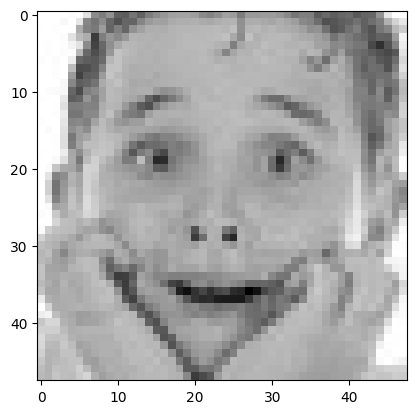

In [12]:
import matplotlib.pyplot as plt
plt.imshow(train_images[16505], cmap='gray')

In [25]:
# build model
cnn = Sequential()
# input layer: takes the raw image data as input
# convolutional layer: feature extraction
cnn.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
# pooling layer: reduce the dimensionality of the feature map
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))
# convolutional layer
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
# pooling layer
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))
# convolutional layer
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
# pooling layer
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

# flatten layer: convert the 2D matrix data to a vector
cnn.add(Flatten())

# fully connected layer: connect the nodes from the previous layer to the next layer
# Fully connected layer
cnn.add(Dense(1024, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(512, activation='relu'))
cnn.add(Dropout(0.5))

# final layer: output layer
# for mutually exclusive classes, use softmax activation function
cnn.add(Dense(7, activation='softmax'))

c:\Users\ASUS\.conda\envs\tf_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,719,239 (10.37 MB)

 Trainable params: 2,719,239 (10.37 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# compile the model
# for optimization, use adam optimizer, and categorical crossentropy loss function
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
# train model
cnn.fit(x=train_images, y=train_labels, batch_size=256, epochs=60)

Epoch 1/60
182/182 ━━━━━━━━━━━━━━━━━━━━ 57s 291ms/step - accuracy: 0.1583 - loss: 1.9411
Epoch 2/60
182/182 ━━━━━━━━━━━━━━━━━━━━ 52s 285ms/step - accuracy: 0.2926 - loss: 1.7739
Epoch 3/60
182/182 ━━━━━━━━━━━━━━━━━━━━ 49s 267ms/step - accuracy: 0.3753 - loss: 1.6167
Epoch 4/60
182/182 ━━━━━━━━━━━━━━━━━━━━ 49s 268ms/step - accuracy: 0.4199 - loss: 1.5160
Epoch 5/60
182/182 ━━━━━━━━━━━━━━━━━━━━ 49s 271ms/step - accuracy: 0.4465 - loss: 1.4502
Epoch 6/60
182/182 ━━━━━━━━━━━━━━━━━━━━ 49s 269ms/step - accuracy: 0.4682 - loss: 1.3982
Epoch 7/60
182/182 ━━━━━━━━━━━━━━━━━━━━ 53s 291ms/step - accuracy: 0.4831 - loss: 1.3541
Epoch 8/60
182/182 ━━━━━━━━━━━━━━━━━━━━ 49s 271ms/step - accuracy: 0.4941 - loss: 1.3255
Epoch 9/60
182/182 ━━━━━━━━━━━━━━━━━━━━ 50s 275ms/step - accuracy: 0.5128 - loss: 1.2798
Epoch 10/60
182/182 ━━━━━━━━━━━━━━━━━━━━ 48s 266ms/step - accuracy: 0.5150 - loss: 1.2756
Epoch 11/60
182/182 ━━━━━━━━━━━━━━━━━━━━ 49s 267ms/step - accuracy: 0.5265 - loss: 1.2418
Epoch 12/60
182/182

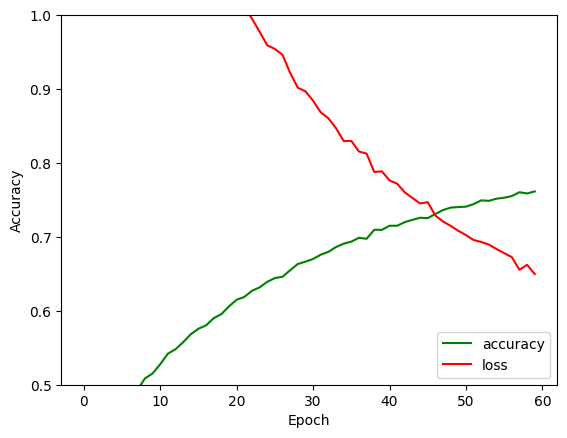

In [32]:
# evaluate model
plt.plot(cnn.history.history['accuracy'], label='accuracy', color='g')
plt.plot(cnn.history.history['loss'], label = 'loss', color='r')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [33]:
# predict
predictions = cnn.predict(test_images)
predictions

380/380 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step


array([[1.6745086e-01, 5.1056255e-02, 2.2368728e-01, ..., 3.4695151e-01,
        1.7361888e-01, 3.2699838e-02],
       [1.6977161e-01, 4.3016672e-02, 3.3120665e-01, ..., 4.8002601e-02,
        7.0494302e-02, 3.3658770e-01],
       [3.5329111e-02, 1.1469645e-03, 6.6625524e-01, ..., 7.0869830e-03,
        6.9351599e-02, 2.2030643e-01],
       ...,
       [1.1313897e-02, 2.2729564e-06, 6.3327089e-02, ..., 2.5595622e-02,
        4.7951262e-03, 8.0941337e-01],
       [2.7703322e-02, 4.1641809e-07, 4.7961972e-03, ..., 4.2948755e-03,
        2.4327693e-04, 9.6295154e-01],
       [3.3017743e-05, 5.6855071e-10, 2.9880583e-02, ..., 2.7831396e-07,
        4.2372054e-07, 9.6930605e-01]], dtype=float32)

In [43]:
predictions.shape

(12141, 7)

In [40]:
predictions[1]

array([0.16977161, 0.04301667, 0.33120665, 0.00092053, 0.0480026 ,
       0.0704943 , 0.3365877 ], dtype=float32)

In [46]:
predicted_class_indices = np.argmax(predictions, axis=1)
# Number of classes
num_classes = predictions.shape[1]

# Convert class indices to one-hot encoding
predicted_one_hot = np.eye(num_classes)[predicted_class_indices]
predicted_one_hot

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [47]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, predicted_one_hot, target_names=class_names))

              precision    recall  f1-score   support

       angry       0.43      0.41      0.42      1733
     disgust       0.64      0.66      0.65      1655
        fear       0.45      0.29      0.35      1744
       happy       0.79      0.80      0.80      1774
     neutral       0.48      0.53      0.51      1758
         sad       0.41      0.47      0.43      1758
    surprise       0.68      0.74      0.71      1719

   micro avg       0.56      0.56      0.56     12141
   macro avg       0.55      0.56      0.55     12141
weighted avg       0.55      0.56      0.55     12141
 samples avg       0.56      0.56      0.56     12141



In [49]:
# save model
cnn.save('models/cnn.h5')